In [3]:
import tensorflow as tf
from tensorflow import keras

In [7]:
#Downloading Data - Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 9s 2us/step


In [12]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [13]:
#Making training and validation sets and scaling data
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation= "relu"),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(10, activation= "softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7176 - accuracy: 0.7656 - val_loss: 0.5197 - val_accuracy: 0.8240
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4922 - accuracy: 0.8279 - val_loss: 0.4558 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4505 - accuracy: 0.8426 - val_loss: 0.4223 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4221 - accuracy: 0.8516 - val_loss: 0.4682 - val_accuracy: 0.8238
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4013 - accuracy: 0.8593 - val_loss: 0.3935 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3848 - accuracy: 0.8642 - val_loss: 0.3710 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8688 - val_loss: 0.3763 - val_accuracy:

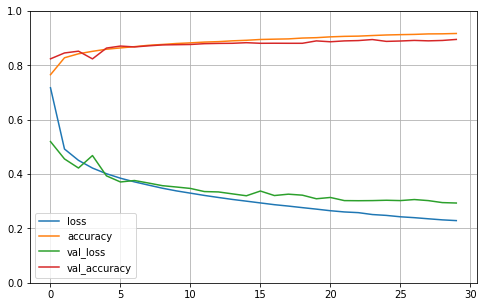

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 74.0226 - accuracy: 0.8263


[74.02264404296875, 0.8263000249862671]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
import numpy as np
y_pred = np.argmax(y_proba, axis =1)
print(y_pred)
print(y_test[:3])


[9 2 1]
[9 2 1]


Regression Nueral Networks on California Housing Data

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)


In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = "sgd")

history = model.fit(X_train_scaled, y_train, epochs=20,
                   validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

y_pred = model.predict(X_test[:3])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7602 - val_loss: 0.9444
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8421 - val_loss: 0.5626
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5013 - val_loss: 0.5394
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4542 - val_loss: 0.4614
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4286 - val_loss: 0.4481
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4180 - val_loss: 0.4461
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4065 - val_loss: 0.4382
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3997 - val_loss: 0.4329
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3938 - val_loss: 0.4275
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3891 - val_loss: 0.4223

In [40]:
y_pred

array([[130.51096],
       [142.95131],
       [121.35759]], dtype=float32)

array([1.381, 0.813, 0.929])